In [14]:
#Credentials import
import json
from google.colab import files
uploaded = files.upload()

Saving ev-eutopia-81a2d-firebase-adminsdk-yzo4h-508e86e4bd.json to ev-eutopia-81a2d-firebase-adminsdk-yzo4h-508e86e4bd.json


In [15]:
#Firebase App
#db is imported AS ff
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db as ff
from google.colab import files
database = "https://ev-eutopia-81a2d.firebaseio.com/"

cred = credentials.Certificate("ev-eutopia-81a2d-firebase-adminsdk-yzo4h-508e86e4bd.json" )
firebase_admin.initialize_app(cred, { 
    'databaseURL': 'https://ev-eutopia-81a2d.firebaseio.com/'
})



ref=ff.reference('users')
print(ref.get())


{'3P4rjXpAFYMN0N22w0UaJ70Xjay2': {'address': 'cgc landran, mohali', 'email': '1abhimanyukharwal.ak@gmail.com', 'first_name': 'Abhimanyu ', 'last_name': 'Kharwal', 'latitude': 30.686930600000004, 'longitude': 76.6648404}, 'EHTMGETYO3aIG3wGZqdv55bl85o2': {'address': 'Mohalla Ahmadiyya, Qadian, Punjab', 'email': 'fwaad.ahmad1@gmail.com', 'first_name': 'Fwaad', 'last_name': 'Ahmad', 'latitude': 31.814715999999997, 'longitude': 75.3776524}, 'IJBllVOcIYWKZN8u5vAwafPhnL72': {'address': 'Cgc Landran, Mohali', 'email': 'davidbekham@gmail.com', 'first_name': 'David', 'last_name': 'Beckham', 'latitude': 30.686930600000004, 'longitude': 76.6648404}, 'RO6WGE6FCkMxp3wlt6Pdzxo93zp2': {'address': '#45-B New Vivek Vihar, Ambala City', 'email': 'namanguptaa04@gmail.com', 'first_name': 'Naman', 'last_name': 'Gupta', 'latitude': 30.376298, 'longitude': 76.753843}, 'jFvEOvVRubMF7DOEhbM7KbB8Niy2': {'address': 'Mohalla Ahmadiyya, Qadian, Punjab', 'email': 'fwaad.ahmad2@gmail.com', 'first_name': 'Fwaad', 'las

[[31.9401287  75.26049121]
 [32.22138923 75.44250872]
 [30.89277045 76.38820677]
 ...
 [30.14176017 75.51353896]
 [30.24420874 75.65613192]
 [29.98380871 75.75297811]]


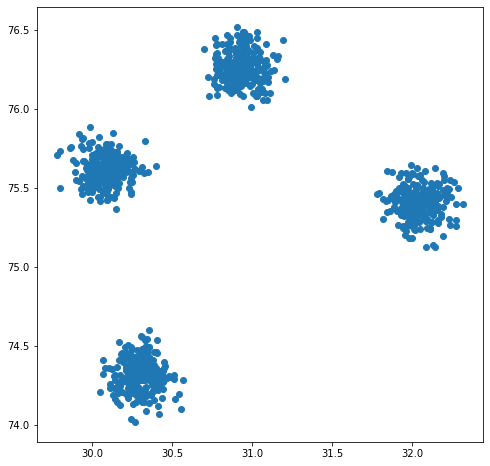

[[32.03964038 75.40276574]
 [30.08958669 75.61565772]
 [30.30121549 74.31666672]
 [30.93819086 76.27031552]]
[32.03964038 75.40276574]
32.03964037585337
75.40276573628016
{'-MCo_r1lNdaux7j6QXp5': {'Latitude': '32.03964037585337', 'Longitude': '75.40276573628016'}, '-MCo_r8O5i5SU3wlvlUA': {'Latitude': '30.938190857501496', 'Longitude': '76.2703155165526'}, '-MCo_rEbmnKKVKbVDQeJ': {'Latitude': '30.301215486525066', 'Longitude': '74.31666671834533'}, '-MCo_rKfg7hS2eoXSSUg': {'Latitude': '30.089586686366005', 'Longitude': '75.61565771570636'}, '-MDVdraGiG7kWirR1dkt': {'Latitude': '30.690895', 'Longitude': '76.664150'}, '-MD_EusaOH_I8fvuDJzG': {'Latitude': 'a', 'Longitude': 'b'}, '-MD_EuyIt3gh1qQ9DjxB': {'Latitude': 'a', 'Longitude': 'b'}, '-MD_Ev-tCMLY_nV2svpB': {'Latitude': 'a', 'Longitude': 'b'}, '-MD_Ev4eHB-NWWQJcxeg': {'Latitude': 'a', 'Longitude': 'b'}, '-MD_F1fu18wrKm-a8xob': {'Latitude': 'a', 'Longitude': 'b'}, '-MD_F1hy__cmivVlsLb-': {'Latitude': 'a', 'Longitude': 'b'}, '-MD_F1kWa5

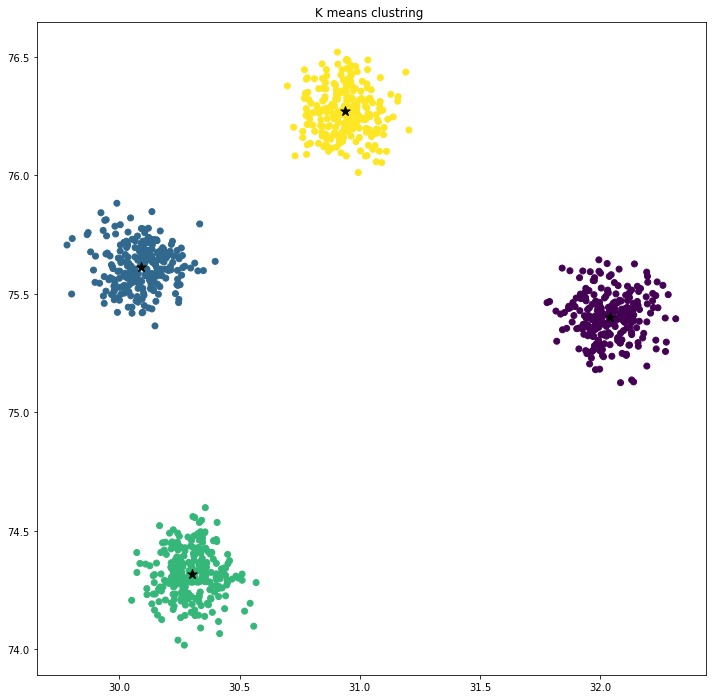

In [22]:
#Ml Algo
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(8,8))

#City coordinaates are the coordinates of the four boundaries of the city.

cityCoordinates = [[32.044984, 75.402493], [30.308945, 74.321969], [30.081049, 75.618356],[30.942350, 76.266549]]

X, labels_true = make_blobs(n_samples=1000, centers=cityCoordinates, cluster_std=0.1, random_state=0)
print (X)

xx, yy = zip(*X)
scatter(xx,yy)
show()
plt.figure(figsize=(12,12))
# db = DBSCAN(eps=0.25, min_samples=10).fit(X)
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("K means clustring ")
centroids =  kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker='*',c='#050505',s=100)
print(centroids)
outputs = centroids

for i in outputs:
  num = 0
  output = outputs[num]
  num = num+1
  print(output)
  a = str(output[0])
  b = str(output[1])
  print(a)
  print(b)
  #Data push to Firebase
  # ref1 = ff.reference("Outputs/")
  print(ref1.get())
  ref1.push({
        'Latitude': a ,
        'Longitude': b
  })
print(ref1.get()) 

# for i in range (0,clustno):   
#      cluster = clusters[i]
#      plt.figure(figsize=(8,8))
#      plt.scatter(cluster[:, 0], cluster[:, 1])
#      kmeans = KMeans(n_clusters=1)
#      kmeans = kmeans.fit(cluster)
#      labels = kmeans.predict(cluster)
#      plt.scatter(cluster[:,0], cluster[:,1], c=labels)
#      plt.title("K means clustring ")
#      centroids =  kmeans.cluster_centers_
#      plt.scatter(centroids[:,0],centroids[:,1])
#     #  print(centroids)
#      outputs = centroids
#     #  print(outputs)
#      for i in outputs:
#        num = 0
#        output = outputs[num]
#        num = num+1
#        print(output)
#        a = output[0]
#        b = output[1]
#        #Data push to Firebase
#        ref1 = ff.reference("Outputs/")
#        print(ref1.get())
#        ref1.push({
#            'Latitude': "a" ,
#            'Longitude': "b"
#        })
#        print(ref1.get()) 
